# SI 618 Day 9: Dimension Reduction

Version 2022.03.14.1.CT

## Task (to generate data for use later in today's class):
Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/1cm33K2dg3vVGWX8Bv0R7_QA3UN5r3IEznYWXbtcbWEs/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10; 
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import manifold

## Demo

Let's set up a really simple dataframe to play with:

In [2]:
demo = pd.DataFrame({'a': [1, 2, 3], 'b': [1, 4, 6], 'c': [
                    2, 4, 6]}, index=['Chris', 'Mauli', 'Alex'])

In [3]:
demo

a  b  c
Chris  1  1  2
Mauli  2  4  4
Alex   3  6  6

And then let's split the dataframe into X and y matrices:

In [4]:
demo_X = demo.values

In [5]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6]], dtype=int64)

In [6]:
demo_y = demo.index

In [7]:
demo_y

Index(['Chris', 'Mauli', 'Alex'], dtype='object')

## Multi-dimensional scaling (MDS)

In [8]:
# initiate a MDS

nmds = manifold.MDS(n_components=2,  # number of dimensions
                    metric=False,  # metric is only for numerical and continious; no-metric is  more conservative and get better results,
                    # NON-metric is recommand
                    max_iter=3000,
                    eps=1e-9,  # when the change smaller than this boundry, no need to iterate again
                    random_state=42,  # random seed
                    dissimilarity='euclidean',
                    n_jobs=1)  # paralell to reduce time of computing

In [9]:
# fit and transform the features metrics X (unsupervised, so no train/test split

npos = nmds.fit_transform(demo_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [12]:
npos

array([[ 0.30946596,  0.29784584],
       [ 0.11775658, -0.34227884],
       [-0.42722732,  0.04444687]])

In [13]:
# each person now is represented by 2 dimension array, eg: Chirs is represented by [ 0.30946596,  0.29784584] now

In [14]:
# concat the 2d data with names

In [15]:
npos_labelled = pd.concat(
    [pd.DataFrame({'who': demo_y}), pd.DataFrame(npos)], axis=1)

In [16]:
npos_labelled.columns = ['who', 'mds1', 'mds2']

In [17]:
npos_labelled

who      mds1      mds2
0  Chris  0.309466  0.297846
1  Mauli  0.117757 -0.342279
2   Alex -0.427227  0.044447

In [18]:
npos_labelled.shape[0]

3

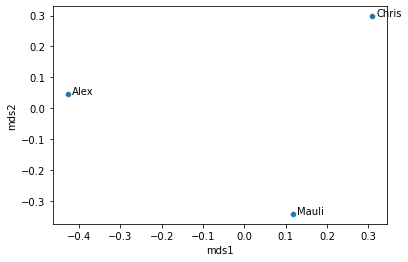

In [19]:
# plot

# Based on https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
p1 = sns.scatterplot(data=npos_labelled, x='mds1', y='mds2')

# adjust text and text position in plot
for line in range(0, npos_labelled.shape[0]):
    p1.text(npos_labelled['mds1'][line]+0.01, npos_labelled['mds2'][line],
            npos_labelled['who'][line], horizontalalignment='left',
            size='medium', color='black')

In [116]:
# the relative distance of original data is preserved here, but x-axis and y-axis has no actual meaning

In [78]:
# summary to a function to future reuse

def labelled_scatterplot(data=None, x=None, y=None, labs=None):
    p1 = sns.scatterplot(data=data, x=x, y=y)
    for line in range(0, data.shape[0]):
        
        # identify myself
        if data[labs][line] == "Ella Li":
            c = "red"
        else:
            c = "black"
            
        p1.text(data[x][line]+0.01, data[y][line],
                data[labs][line], horizontalalignment='left',
                size='medium', color=c)

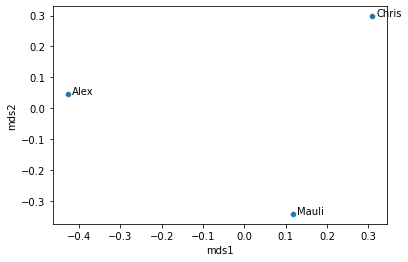

In [21]:
labelled_scatterplot(npos_labelled, 'mds1', 'mds2', 'who')

## Principal Components Analysis (PCA)

In [22]:
demo

a  b  c
Chris  1  1  2
Mauli  2  4  4
Alex   3  6  6

In [24]:
# what is a variance expamle
np.var([-1.29777, .016222, 1.135549])

0.9889454738615555

In [26]:
# scale (important for PCA !!)
# scale: convert the values to have mean=0, var=1 for each column;
# because PCA is trying to explain as much as var as possible while as less dimenssion as possible;

from sklearn.preprocessing import scale
scale(demo_X)

array([[-1.22474487, -1.29777137, -1.22474487],
       [ 0.        ,  0.16222142,  0.        ],
       [ 1.22474487,  1.13554995,  1.22474487]])

In [27]:
# scale is necessary, because different types of variables;
# PCA is sensitive to as much variance as posible, while reducing the dimension,
# to avoid the PCA keep much more than part of variance, we need to scale all the variables

In [28]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

In [30]:
X_pca  # get reduced dimensioned data

array([[ 2.16341882, -0.06188307],
       [-0.09352034,  0.13255088],
       [-2.06989849, -0.07066781]])

In [32]:
# combine labels

X_pca_labelled = pd.concat([pd.DataFrame({'who': demo_y}), pd.DataFrame(
    X_pca, columns=['pca1', 'pca2'])], axis=1)

In [33]:
X_pca_labelled

who      pca1      pca2
0  Chris  2.163419 -0.061883
1  Mauli -0.093520  0.132551
2   Alex -2.069898 -0.070668

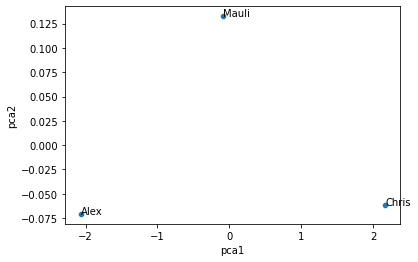

In [34]:
labelled_scatterplot(data=X_pca_labelled, x='pca1', y='pca2', labs='who')

In [35]:
# pca1's expressed porportional variance range (-2,2) is larger than pca2's expressed variance;
# pca is interpretable

In [36]:
# how much varience is explained by each priciple components
pca.explained_variance_  # pca1, pca2

array([4.48680341, 0.01319659])

In [37]:
# total system varience == diagnal values' sum
np.cov(X_pca)

array([[ 2.47598426, -0.25153836, -2.2244459 ],
       [-0.25153836,  0.0255541 ,  0.22598426],
       [-2.2244459 ,  0.22598426,  1.99846164]])

In [38]:
# how much % variance is expplained by each priciple components
pca.explained_variance_ratio_

array([0.99706742, 0.00293258])

In [39]:
# here, the 1st pca factor's ratio is sooo high, we dont need to care other pca factors/ priciple components

### Question: 
What's the expected explained variance ratio for each variable?

**Answer:** for n variables, the expected explained variance for each variable is 1/n.

In [124]:
# how many priciple components should keep?
# 1. by scree plot, elbow point;
# 2. the kept priciple component should have more than 1/n explained_variance_ratio_ (should explain more than a original variable);

In [45]:
# if we can find corr by pairplot, the pca is worth to do to reduce dimension

## t-SNE

In [46]:
# obey t distribution, close(far) variables are still close(far) in reduced dimension space

In [47]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(n_components=2, random_state=0)
X = demo_X.copy()
X_2d = tsne.fit_transform(X)

In [49]:
X_2d

array([[-1015.70056,  1338.9812 ],
       [ -387.996  ,  -373.31616],
       [-2184.7456 ,   -60.5658 ]], dtype=float32)

In [50]:
tsne_labelled = pd.concat([pd.DataFrame({'who': demo_y}), pd.DataFrame(
    X_2d, columns=['d1', 'd2'])], axis=1)

In [51]:
tsne_labelled

who           d1           d2
0  Chris -1015.700562  1338.981201
1  Mauli  -387.996002  -373.316162
2   Alex -2184.745605   -60.565800

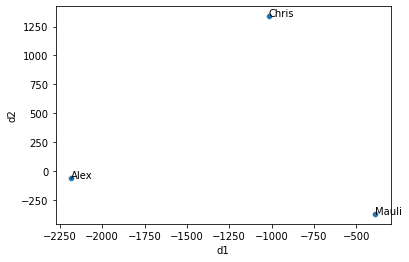

In [52]:
labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='who')

(copy to chat:)
https://cs.stanford.edu/people/karpathy/tsnejs/csvdemo.html

High perplexities therefore enforce more global structure in the embedding, and smaller perplexities will cut up your data cloud on much finer level.
usually 5-30;

# In your groups

Let's read the CSV file of the music data we generated at the start of today's class:

In [54]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [55]:
music

Name  Blues  Classical  Country  Electronic  Folk  Hip Hop  Jazz  \
0    Abdul W      5          7        6         6.0     8        9     8   
1      Aditi      8          9        8         5.0     9        5     7   
2    Akshata      5          9        8         1.0     9        5     7   
3   Amanda H      3          7        6         7.0     5        7     3   
4      Anand      4          3        3         7.0     6        9     5   
..       ...    ...        ...      ...         ...   ...      ...   ...   
61  YuantaoB      4          9        9         3.0     3        2     1   
62  Yuhang Z     10          8        5         3.0     4       10     6   
63      Zane      5          8        5         7.0     8        7     8   
64    Zhiang      5          1        6         9.0     7       10     3   
65   Ella Li      7          3        6         8.0     4        9     6   

    Latin  Pop  Rock  
0       4   10     8  
1       7    5     6  
2       3    3     1  
3       5   10     5  
4       7    6     5  
..    ...  ...   ...  
61      5    8     1  
62      1    7     1  
63      7   10     9  
64      2    8     4  
65      2    8    10  

[66 rows x 11 columns]

In [56]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        66 non-null     object 
 1   Blues       66 non-null     int64  
 2   Classical   66 non-null     int64  
 3   Country     66 non-null     int64  
 4   Electronic  65 non-null     float64
 5   Folk        66 non-null     int64  
 6   Hip Hop     66 non-null     int64  
 7   Jazz        66 non-null     int64  
 8   Latin       66 non-null     int64  
 9   Pop         66 non-null     int64  
 10  Rock        66 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.8+ KB


In [57]:
music.describe()

Blues  Classical    Country  Electronic       Folk    Hip Hop  \
count  66.000000  66.000000  66.000000   65.000000  66.000000  66.000000   
mean    5.636364   6.424242   5.712121    5.338462   6.030303   6.454545   
std     2.042897   2.253617   2.251599    2.507968   2.119287   2.701463   
min     1.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
25%     4.000000   5.000000   5.000000    3.000000   5.000000   4.000000   
50%     6.000000   7.000000   6.000000    6.000000   6.000000   7.500000   
75%     7.000000   8.000000   7.750000    7.000000   7.750000   9.000000   
max    10.000000  10.000000  10.000000   10.000000   9.000000  10.000000   

            Jazz      Latin        Pop       Rock  
count  66.000000  66.000000  66.000000  66.000000  
mean    6.090909   4.681818   7.833333   6.530303  
std     2.174872   2.156629   2.012143   2.695978  
min     1.000000   1.000000   1.000000   1.000000  
25%     5.000000   3.000000   7.000000   5.000000  
50%     6.000000   4.500000   8.000000   7.000000  
75%     8.000000   6.000000   9.000000   9.000000  
max    10.000000   9.000000  10.000000  10.000000

<AxesSubplot:>

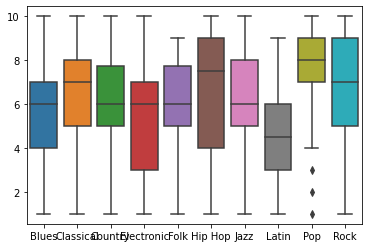

In [58]:
sns.boxplot(data=music)

<AxesSubplot:>

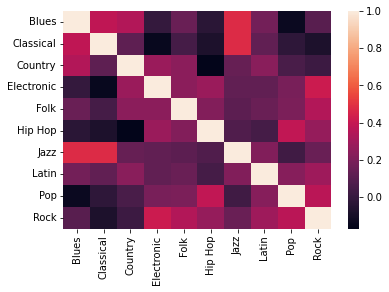

In [59]:
sns.heatmap(music.corr())

In [60]:
# see some corr/structure here, can do PCA

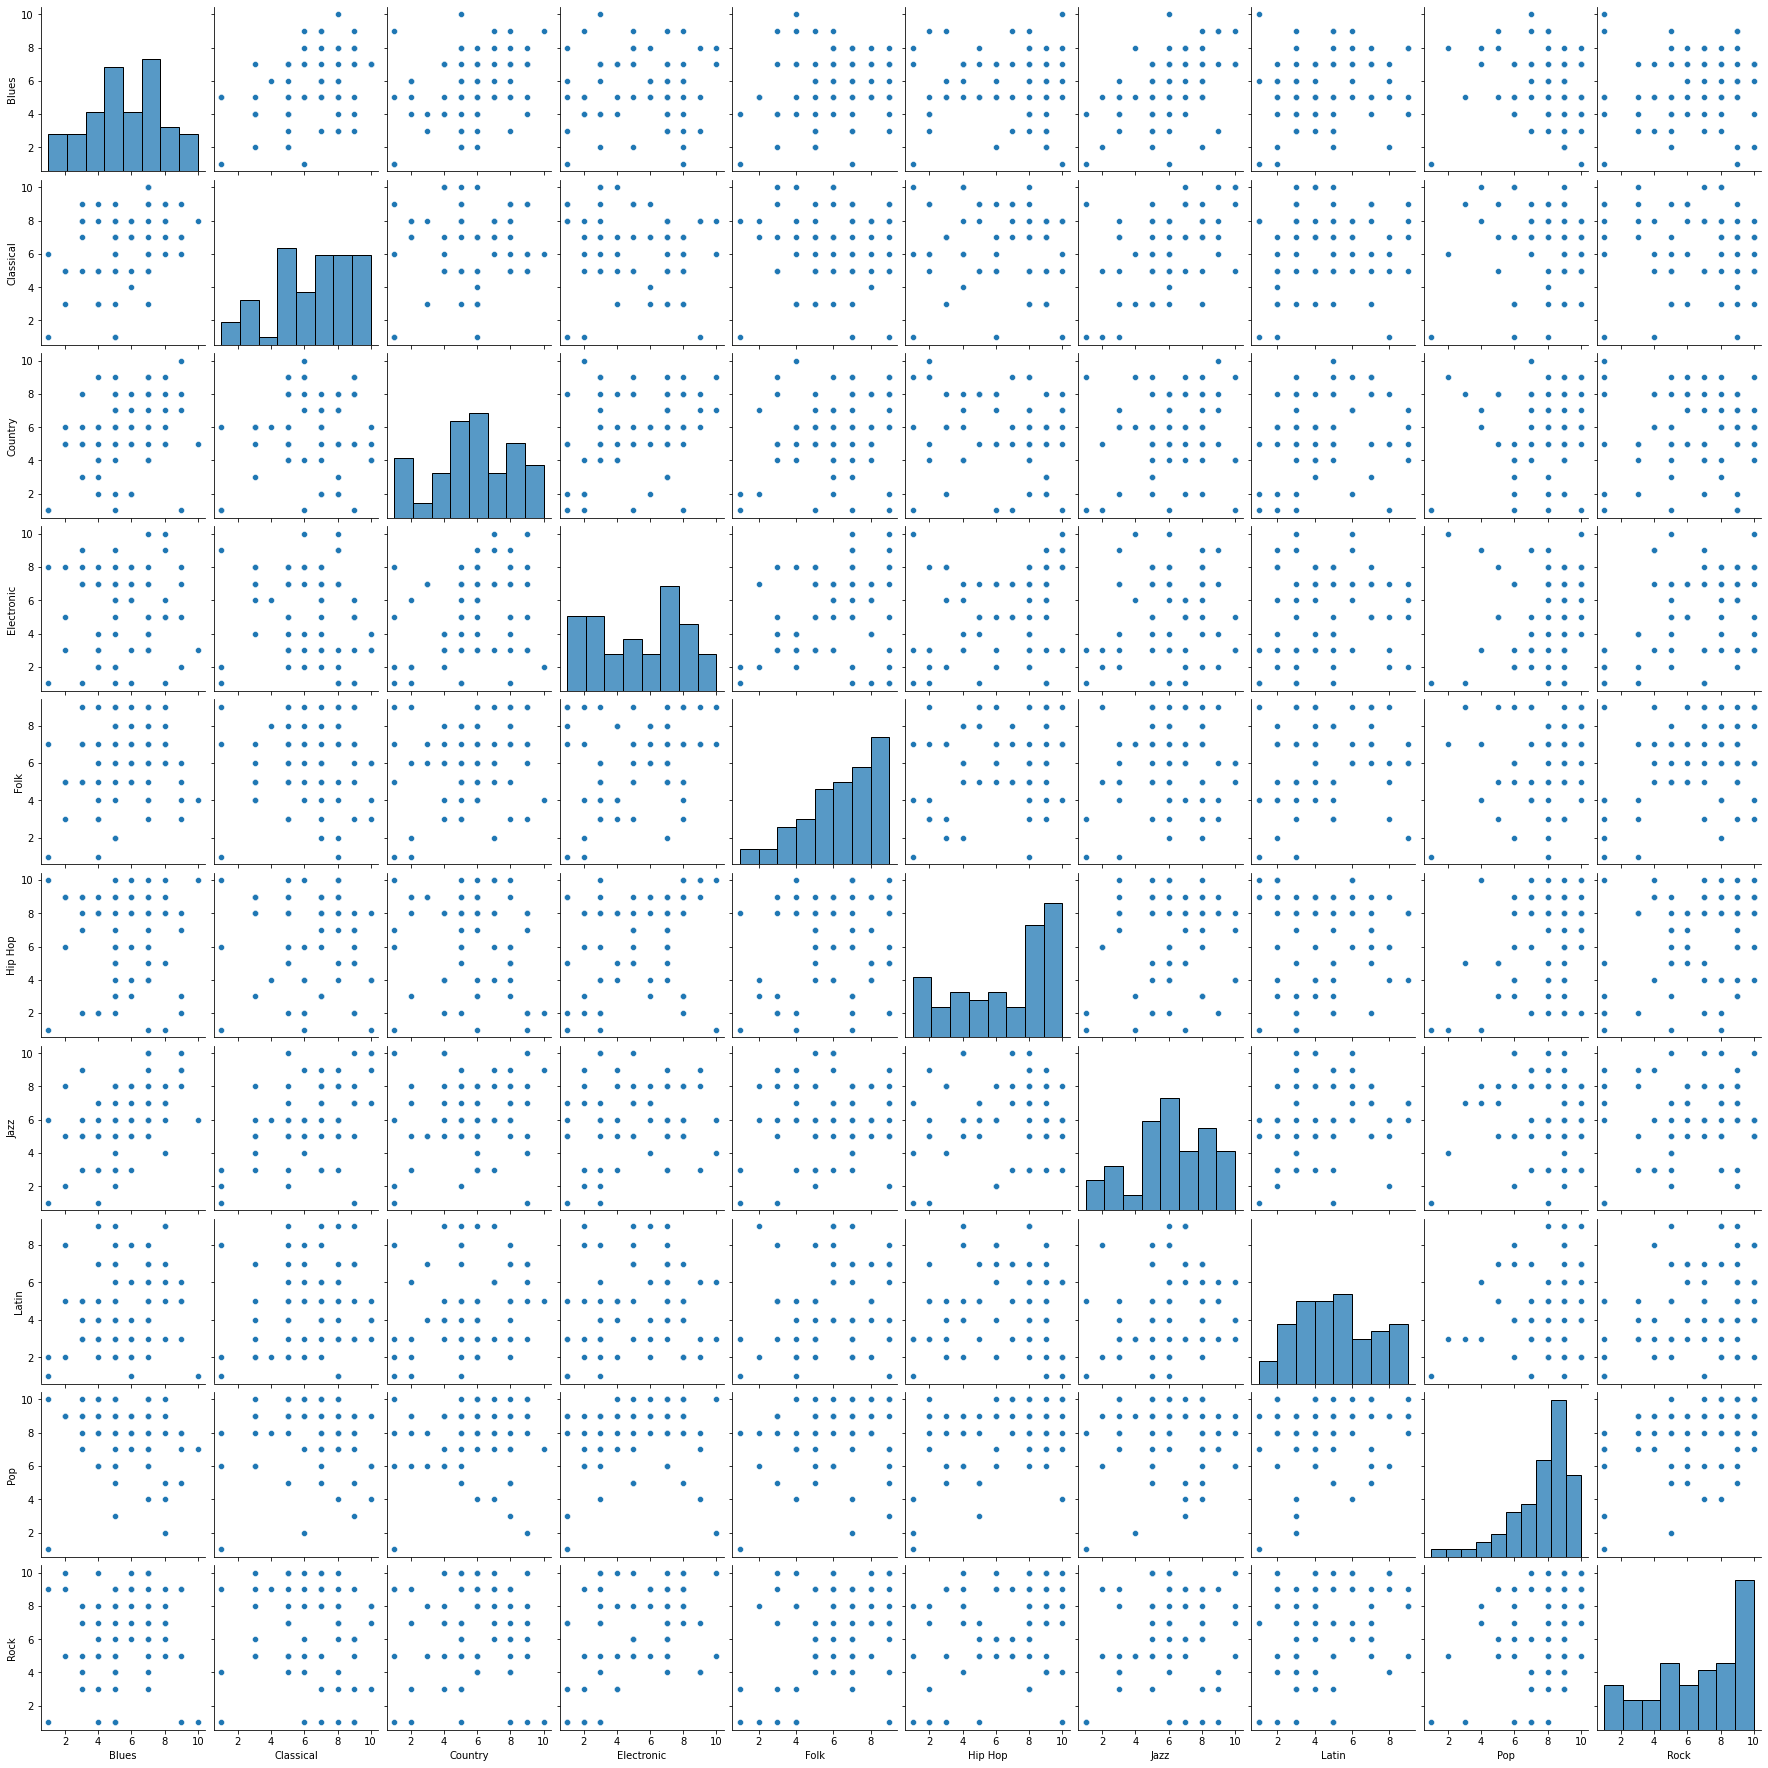

In [61]:
sns.pairplot(music)

## Task
Create X (features matrix) and y (labels matrix) from the `music` dataframe:

In [135]:
music.head()
music = music.dropna()

In [136]:
# 1. method 1
X = music.drop("Name", axis=1)
y = music.Name

In [137]:
# 2. method 2
music_copy = music.copy()
music_copy = music.set_index("Name")
music_copy

X = music_copy.values
y = music_copy.index

## Task --- MDS
Perform a multi-dimensional scaling on the music data.  Should you use metric or non-metric MDS?  Do the 
results differ between metric and non-metric?  Visualize your results.

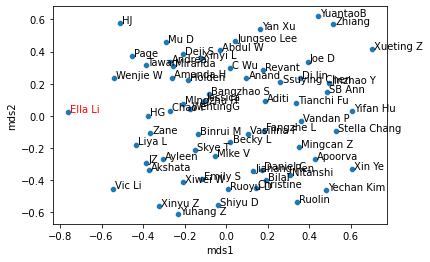

In [125]:
nmds = manifold.MDS(n_components=2,
                    metric=False, # non-metric MDS
                    max_iter=3000,
                    eps=1e-9,
                    random_state=42,
                    dissimilarity='euclidean',
                    n_jobs=1)
npos = nmds.fit_transform(X)
npos_labelled = pd.concat(
    [pd.DataFrame({'Name': y}), pd.DataFrame(npos)], axis=1)
npos_labelled.columns = ['Name', 'mds1', 'mds2']
labelled_scatterplot(npos_labelled, 'mds1', 'mds2', 'Name')

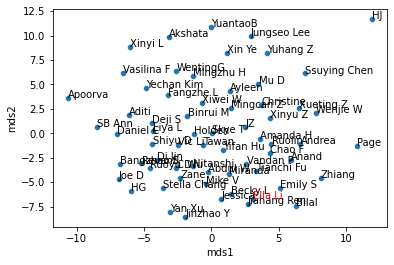

In [126]:
nmds = manifold.MDS(n_components=2,
                    metric=True, # metric MDS
                    max_iter=3000,
                    eps=1e-9,
                    random_state=42,
                    dissimilarity='euclidean',
                    n_jobs=1)
npos = nmds.fit_transform(X)
npos_labelled = pd.concat(
    [pd.DataFrame({'Name': y}), pd.DataFrame(npos)], axis=1)
npos_labelled.columns = ['Name', 'mds1', 'mds2']
labelled_scatterplot(npos_labelled, 'mds1', 'mds2', 'Name')

Using metric MDS is more reasonable here, since we are not dealing with categorical data. We can see from the two plots that the results differ between metric and non-metric.

## Task -- PCA
Perform a principal components analysis (PCA) on the music data.  Do you think you should scale the data before you
do the PCA?  How many principal components should you retain (hint: look at a scree plot and/or eigenvalues, a.k.a. the explained_variance_ attribute of the PCA model).  Visualize your results.

array([0.26971397, 0.18749673, 0.12574985, 0.09421775, 0.0750761 ])

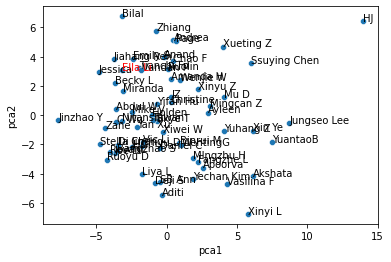

In [148]:
# PCA(n_components=5)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca_labelled = pd.concat([pd.DataFrame({'Name': y}),
                            pd.DataFrame(X_pca, columns=[
                                         'pca1', 'pca2', 'pca3', 'pca4', 'pca5'])
                            ], axis=1)
labelled_scatterplot(data=X_pca_labelled, x='pca1', y='pca2', labs='Name')
pca.explained_variance_ratio_

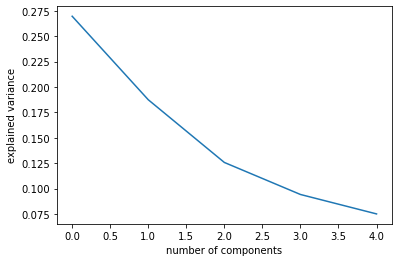

In [149]:
# scree plot

from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

array([0.26971397, 0.18749673, 0.12574985])

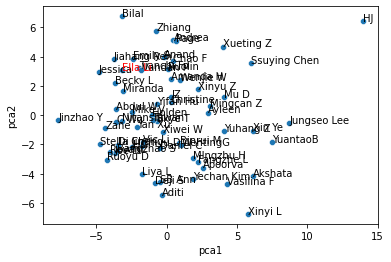

In [150]:
# PCA(n_components=3)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca_labelled = pd.concat([pd.DataFrame({'Name': y}),
                            pd.DataFrame(X_pca, columns=[
                                         'pca1', 'pca2', 'pca3'])
                            ], axis=1)
labelled_scatterplot(data=X_pca_labelled, x='pca1', y='pca2', labs='Name')
pca.explained_variance_ratio_

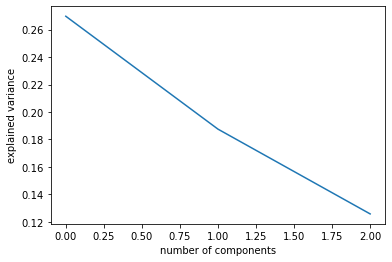

In [151]:
# scree plot

from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [143]:
music_copy

Blues  Classical  Country  Electronic  Folk  Hip Hop  Jazz  Latin  \
Name                                                                          
Abdul W       5          7        6         6.0     8        9     8      4   
Aditi         8          9        8         5.0     9        5     7      7   
Akshata       5          9        8         1.0     9        5     7      3   
Amanda H      3          7        6         7.0     5        7     3      5   
Anand         4          3        3         7.0     6        9     5      7   
...         ...        ...      ...         ...   ...      ...   ...    ...   
YuantaoB      4          9        9         3.0     3        2     1      5   
Yuhang Z     10          8        5         3.0     4       10     6      1   
Zane          5          8        5         7.0     8        7     8      7   
Zhiang        5          1        6         9.0     7       10     3      2   
Ella Li       7          3        6         8.0     4        9     6      2   

          Pop  Rock  
Name                 
Abdul W    10     8  
Aditi       5     6  
Akshata     3     1  
Amanda H   10     5  
Anand       6     5  
...       ...   ...  
YuantaoB    8     1  
Yuhang Z    7     1  
Zane       10     9  
Zhiang      8     4  
Ella Li     8    10  

[65 rows x 10 columns]

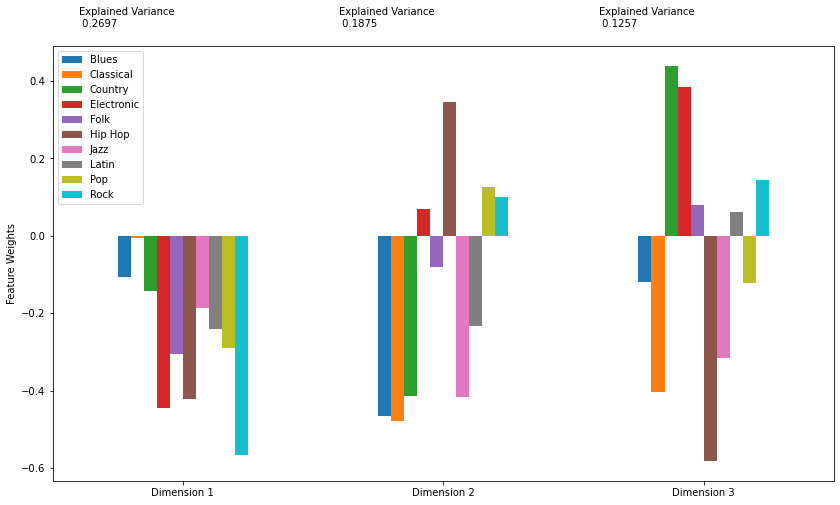

In [152]:
# factors loading diagram (can help interprete the PCA)

def pca_results(data, pca):

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i)
                  for i in range(1, len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(
        np.round(pca.components_, 4), columns=data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(
        np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind='bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios#
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05,
                "Explained Variance\n %.4f" % (ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)


pca_results = pca_results(music_copy, pca)

* No, I do not think I should scale the data before I do the PCA. This is because the data points in different columns all range from 1-10, and they have the same units. 
* I retained 3 principal components, as there are 10 variables originally, and starting from the 4th component, although we can not find obvious elbow point from scree plot, we can find that each of the principal components starting from 4th components contributes to less than 10% of the explained variance.

In [153]:
# factors loading diagram (can help interprete the PCA)

# 3 principal components here in x-axis
# y-axis are feature weights (corrolations between variables and that pc)

# the first pc is negtively correlated with all of the music genres, so first pc(dimension) should be "music dislike/haters factor"
# the second pc should be "hip op pop rock electronic lovers factor"
# the third pc should be "country folk latin rock electronic lovers factor"

# and these 3 componets all explained var more than 1/n (10% in this case), so worth to keep;

## Task -- TSNE
Perform a t-SNE analysis of the music data.  Experiment with different hyperparameters (i.e. perplexity and n_iter) to see how your solution changes.  Visualize your results.

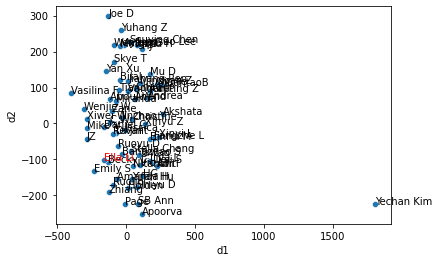

In [157]:
# TSNE(n_components=2, random_state=0, perplexity=7)

tsne = TSNE(n_components=2, random_state=0, perplexity=7)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat(
    [pd.DataFrame({'Name': y}), pd.DataFrame(X_2d, columns=['d1', 'd2'])], axis=1)
labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='Name')

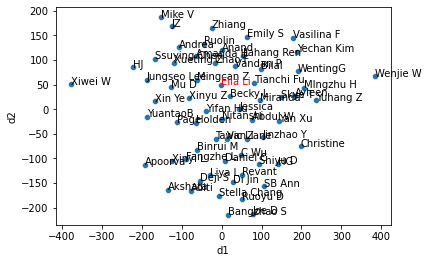

In [158]:
# TSNE(n_components=2, random_state=0, perplexity=15)

tsne = TSNE(n_components=2, random_state=0, perplexity=15)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat(
    [pd.DataFrame({'Name': y}), pd.DataFrame(X_2d, columns=['d1', 'd2'])], axis=1)
labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='Name')

* Using different hyperparameters generates quite different solutions. A same point could cluster with quite different data points with different numbers of perplexity or n_iter. 
* The higher the perplexity is, the less important the local clustering is.

## Task -- COMPARE 3 MODELS
Compare the three analyses (MDS, PCA, and t-SNE).  Comment on similarities and differences.  What do you think the best technique is to use with the music data?

* Similarities: The three analyses all reduce dimensions of the data.

* Differences: The results are different. MDS provides metric and non-metric options, and non-metric MDS might be the most suitable method among the three analyses when dealing with categorical data. Before using PCA, we usually need to scale the data, but this is not required in MDS and t-SNE. t-SNE is sensitive to hyperparameters, which is not the same in MDS and PCA, and also need a lot of computing resources;

* Best technique: I think PCA is the best technique to use with the music data, since the clustering trend is more clearly showed in PCA and it is easy to perform and gives us clearer answers.

* PCA seeks to preserve the variance in the data. When we use it to construct a two-dimensional projection, it finds the projection plane were the most spread data. 
* MDS aims to preserve the distances between pairs of data points, focusing on pairs of distant points in the original space. 
* t-SNE focuses on maintaining neighborhood data points. Data points that are close in the original data space will be tight in the t-SNE embeddings.

* Interestingly, MDS and PCA visualizations bear many similarities, while t-SNE embeddings are pretty different. 
* We use t-SNE to expose the clustering structure, MDS when global relations matter, and PCA as a preprocessing technique to reduce dimensionality and remove noise.

## Stretch task

Use a Pipeline to perform a PCA on the music data.

In [159]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=42)),
])

In [160]:
pipe.fit_transform(X)

array([[-1.42689395, -0.65449593, -0.78312246, -0.50547043,  0.53640687],
       [-1.14354524,  2.18935639,  0.86464434, -0.16955109,  0.77390745],
       [ 1.53291155,  2.63808312,  0.48317514, -1.19999728,  1.89742505],
       [ 0.52797303, -1.29290394,  0.21461859,  0.81629241,  0.17042766],
       [ 0.67931187, -1.50811309,  0.09000295,  0.05160328, -0.87544444],
       [ 1.20639202, -2.10849929,  0.17975288,  0.11209422,  0.10117675],
       [ 0.71429906,  1.73539611,  3.528527  , -1.76862504, -0.68573864],
       [ 1.10176399,  0.65102871, -1.37265218, -0.32634166, -0.61992789],
       [-1.86280362,  0.58484213, -0.16543183,  0.45591178, -0.23715347],
       [-0.90918467, -1.31162884,  0.63852159, -1.48241925,  0.13155925],
       [ 0.11625416, -3.12412026, -1.67120569, -0.91645138, -0.09301649],
       [-0.21346863,  0.65981892,  1.05625483,  0.050276  ,  1.00409588],
       [-1.41355427, -0.41945208, -0.05808743,  1.22551583, -0.57554905],
       [ 1.01667845, -1.31169497,  0.6

# Clustering

## A few words about pipelines

Consider the following pipeline:

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=42)),
])

The pipeline can be queried by using `get_params()`:

In [163]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [164]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [165]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [166]:
pipe.named_steps.pca.n_components = 3

In [167]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

And you can also use the <estimator>__<parameter> syntax:


In [168]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Ok, on to today's notebook, which consists of two tasks.  First, let's load the music data we generated in an earlier class:

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns

In [170]:
# let's use these imports to make life easier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [171]:
music = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv')

In [172]:
music.head()

Name  Blues  Classical  Country  Electronic  Folk  Hip Hop  Jazz  \
0   Abdul W      5          7        6         6.0     8        9     8   
1     Aditi      8          9        8         5.0     9        5     7   
2   Akshata      5          9        8         1.0     9        5     7   
3  Amanda H      3          7        6         7.0     5        7     3   
4     Anand      4          3        3         7.0     6        9     5   

   Latin  Pop  Rock  
0      4   10     8  
1      7    5     6  
2      3    3     1  
3      5   10     5  
4      7    6     5

## Task
Create a feature matrix and a labels matrix from the music dataframe.  Assign them to `X` and `y`, respectively (note the use of uppercase X and lowercase y).

In [173]:
X

array([[ 5.,  7.,  6.,  6.,  8.,  9.,  8.,  4., 10.,  8.],
       [ 8.,  9.,  8.,  5.,  9.,  5.,  7.,  7.,  5.,  6.],
       [ 5.,  9.,  8.,  1.,  9.,  5.,  7.,  3.,  3.,  1.],
       [ 3.,  7.,  6.,  7.,  5.,  7.,  3.,  5., 10.,  5.],
       [ 4.,  3.,  3.,  7.,  6.,  9.,  5.,  7.,  6.,  5.],
       [ 4.,  3.,  6.,  4.,  4.,  8.,  3.,  2., 10.,  8.],
       [ 8.,  6.,  9., 10.,  7.,  1.,  4.,  3.,  2.,  5.],
       [ 5.,  7.,  4.,  4.,  4.,  8.,  8.,  4.,  7.,  3.],
       [ 7.,  5.,  9.,  3.,  6.,  8., 10.,  6.,  9., 10.],
       [ 6.,  5.,  8.,  8.,  7., 10.,  5.,  2.,  9.,  8.],
       [ 1.,  6.,  1.,  8.,  7., 10.,  6.,  2., 10.,  9.],
       [ 7.,  5.,  8.,  4.,  8.,  5.,  6.,  5.,  8.,  5.],
       [ 6.,  7.,  5.,  7.,  6.,  6.,  6.,  8.,  9., 10.],
       [ 4.,  3.,  5.,  7.,  5.,  8.,  5.,  4.,  6.,  6.],
       [ 4.,  5.,  4.,  2.,  7.,  8.,  7.,  9.,  9.,  5.],
       [ 5.,  8.,  7.,  7.,  2.,  4.,  6.,  9.,  8.,  8.],
       [ 7.,  9.,  8.,  5.,  7.,  6.,  8.,  7.,  7.,  6.

In [174]:
y

Index(['Abdul W', 'Aditi', 'Akshata', 'Amanda H', 'Anand', 'Andrea', 'Apoorva',
       'Ayleen', 'Bangzhao S', 'Becky L', 'Bilal', 'Binrui M', 'C Wu',
       'Chao F', 'Christine', 'Daniel C', 'Deji S', 'Di Jin', 'Emily S',
       'Fangzhe L', 'HG', 'HJ', 'Holden', 'Jessica', 'Jiahang Ren',
       'Jinzhao Y', 'Joe D', 'Jungseo Lee', 'JZ', 'Liya L', 'Mike V',
       'Mingcan Z', 'MIngzhu H', 'Miranda', 'Mu D', 'Nitanshi ', 'Page',
       'Revant', 'Ruolin', 'Ruoyu D', 'SB Ann', 'Shiyu D', 'Skye T',
       'Ssuying Chen', 'Stella Chang', 'Tawan', 'Tianchi Fu', 'Vandan P',
       'Vasilina F', 'Vic Li', 'Wenjie W', 'WentingG', 'Xin Ye', 'Xinyi L',
       'Xinyu Z', 'Xiwei W', 'Xueting Z', 'Yan Xu', 'Yechan Kim', 'Yifan Hu',
       'YuantaoB', 'Yuhang Z', 'Zane', 'Zhiang', 'Ella Li'],
      dtype='object', name='Name')

## Task

Create a pipeline that does the following:

1. Fills NA values with 1
2. Scales each variable to mean=0 and variance=1
3. Uses PCA to reduce the number of dimensions to 5; make sure you set random_state to some constant to allow you to reproduce your results
4. Uses the PCA projections (i.e. the transformed X matrix) as input to agglomerative clustering

Report the percent variance that is retained in the 5-dimensional PCA.

Use the output from the pipeline to create a visualization of the resulting clustering (i.e. create a dendrogram).  Annotate the visulization with a horizontal line that "cuts" the tree at a reasonable level and provide a written summary of each cluster's membership.  Save the resulting dendrogram to a PDF file called 'music_clusters.pdf' (hint: use `plt.savefig()`)

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # fill NA 


pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=1)), # fill NA, default will fill with mean
    ('scale', StandardScaler()), # Scales each variable to mean=0 and variance=1
    ('pca', PCA(n_components=5, random_state=42)), # can change to use MDS or TSNE
])

pipe.fit_transform(X) # get scaled impted reduced 5 dimention data

array([[-1.42689395, -0.65449593, -0.78312246, -0.50547043,  0.53640687],
       [-1.14354524,  2.18935639,  0.86464434, -0.16955109,  0.77390745],
       [ 1.53291155,  2.63808312,  0.48317514, -1.19999728,  1.89742505],
       [ 0.52797303, -1.29290394,  0.21461859,  0.81629241,  0.17042766],
       [ 0.67931187, -1.50811309,  0.09000295,  0.05160328, -0.87544444],
       [ 1.20639202, -2.10849929,  0.17975288,  0.11209422,  0.10117675],
       [ 0.71429906,  1.73539611,  3.528527  , -1.76862504, -0.68573864],
       [ 1.10176399,  0.65102871, -1.37265218, -0.32634166, -0.61992789],
       [-1.86280362,  0.58484213, -0.16543183,  0.45591178, -0.23715347],
       [-0.90918467, -1.31162884,  0.63852159, -1.48241925,  0.13155925],
       [ 0.11625416, -3.12412026, -1.67120569, -0.91645138, -0.09301649],
       [-0.21346863,  0.65981892,  1.05625483,  0.050276  ,  1.00409588],
       [-1.41355427, -0.41945208, -0.05808743,  1.22551583, -0.57554905],
       [ 1.01667845, -1.31169497,  0.6

In [180]:
# can even build a loop to get results for different n_components
results = []
for n in [2,3,4,5,6]:
    pipe.set_params(pca__n_components=n)
    results.append(pipe.fit_transform(X))

In [181]:
# Report the percent variance that is retained in the 5-dimensional PCA.

pipe.named_steps.pca.explained_variance_ratio_

array([0.25060644, 0.19879948, 0.11844018, 0.09297722, 0.07888218,
       0.07342802])

In [119]:
! pip install plotly

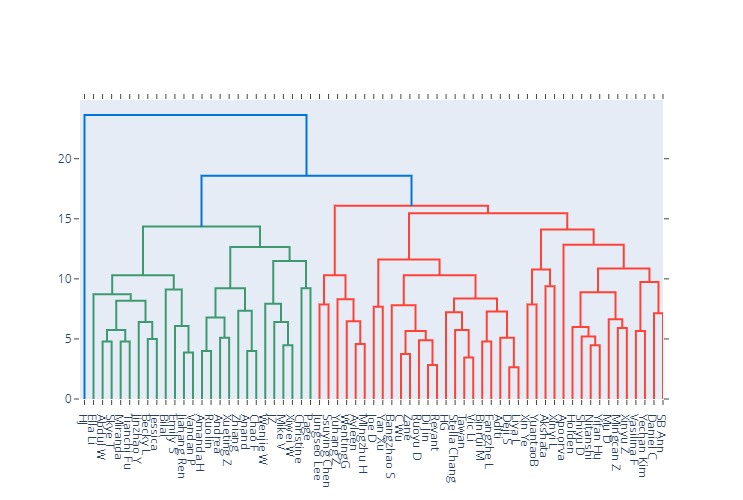

In [182]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np

np.random.seed(1)

fig = ff.create_dendrogram(X, labels=y)
fig.update_layout(width=800, height=500)
fig.show()

## Task

Conduct a k-means clustering of the music data.  Preprocess the data by scaling it and performing a PCA and retaining 2 dimensions.  Use the PCA scores as input to the clustering. Use silhouette plots to determine the optimal number of clusters.  If time permits, experiment with changing the number of principal components.  Be sure to set your random_state to allow you to reproduce your results.

Note that you do not need to use a pipeline, although doing so may make your life easier.

In [121]:
# Insert your code here